# **MSBA 604 Final Project: Accounting Advisory**


## **IPO Advisory**

### **#1 Daily Stock Price Analysis**

In [1]:
import requests
import pandas as pd
import plotly.graph_objects as go

# Get ticker symbol from user input
tick_symbol = input("Enter company ticker symbol for a similiar company: ")

# Alpha Vantage API call to get daily stock data
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={tick_symbol}&apikey=J6JJENJ7ZJAMDJER'
r = requests.get(url)
data = r.json()

# Access the daily time series data
time_series_data = data['Time Series (Daily)']

# Create a pandas DataFrame and transpose it
df = pd.DataFrame(time_series_data).T

# Convert the index to datetime objects
df.index = pd.to_datetime(df.index)

# Rename the columns
df.columns = ['open', 'high', 'low', 'close', 'volume']

# Convert data to numeric types
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

# Display summary statistics
display(df.describe())

# Create a figure with a candlestick chart and a line chart for closing price
fig = go.Figure()

# Add Candlestick trace
fig.add_trace(go.Candlestick(x=df.index,
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'], name='Candlestick'))

# Add Line trace for closing price
fig.add_trace(go.Scatter(x=df.index, y=df['close'], mode='lines', name='Close Price Line', line=dict(color='blue', width=1)))

fig.update_layout(
    title=f'Stock Price Analysis for {tick_symbol}',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False # Hide range slider for cleaner look, or set to True if desired
)

fig.show()

Enter company ticker symbol for a similiar company: XOMA


,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.00000,100.000000
mean,33.076782,33.915565,32.188137,33.05895,50820.200000
std,3.887612,3.878183,3.677941,3.83041,23734.251038
min,24.510000,25.080000,24.082600,24.77000,12992.000000
25%,31.418750,32.420000,30.700000,31.53500,33219.500000
50%,33.557500,34.270000,32.540000,33.36250,49587.500000
75%,36.142500,36.991500,34.670000,36.37000,64539.250000
max,39.560000,39.920000,39.335000,39.72000,125739.000000


### **#2 S-1 Filing Analysis**

To run, please download Q1, Q2, and Q3 zip folders from the SEC Financial Dataset website, click [HERE](https://www.sec.gov/data-research/sec-markets-data/financial-statement-data-sets), to get folders.



In [2]:
import pandas as pd

# Based on the inspection, the file is tab-separated.
# Use pd.read_csv with a tab delimiter to load the data.
sub_q1 = pd.read_csv('/content/sub_2025Q1.txt', delimiter='\t')
sub_q2 = pd.read_csv('/content/sub_2025Q2.txt', delimiter='\t')
sub_q3 = pd.read_csv('/content/sub_2025Q3.txt', delimiter='\t')
num_q1 = pd.read_csv('/content/num_2025Q1.txt', delimiter='\t')
num_q2 = pd.read_csv('/content/num_2025Q2.txt', delimiter='\t')
num_q3 = pd.read_csv('/content/num_2025Q3.txt', delimiter='\t')

In [3]:
import pandas as pd

# Concatenate the three DataFrames
all_sub_data = pd.concat([sub_q1, sub_q2, sub_q3], ignore_index=True)

# Display the first few rows of the combined DataFrame and its shape
display(all_sub_data.head())
print(f"Shape of the combined DataFrame: {all_sub_data.shape}")

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
0,0000015615-25-000021,15615,MASTEC INC,1623.0,US,FL,CORAL GABLES,33134,800 S. DOUGLAS ROAD,12TH FLOOR,...,20241231.0,2024.0,FY,20250228,2025-02-28 06:07:00.0,0,1,mtz-20241231_htm.xml,1,NaN
1,0000016058-25-000032,16058,CACI INTERNATIONAL INC /DE/,7373.0,US,VA,RESTON,20190,TWO RESTON OVERLOOK,12021 SUNSET HILLS ROAD,...,20241231.0,2025.0,Q2,20250128,2025-01-28 13:06:00.0,0,1,caci-20241231_htm.xml,1,NaN
2,0000016732-25-000026,16732,CAMPBELL'S CO,2000.0,US,NJ,CAMDEN,08103,CAMPBELL PL,NaN,...,20250131.0,2025.0,Q2,20250305,2025-03-05 07:24:00.0,0,1,cpb-20250126_htm.xml,1,NaN
3,0000016868-25-000011,16868,CANADIAN NATIONAL RAILWAY CO,4011.0,CA,QC,CANADA,H3B 2M9,935 DE LA GAUCHETIERE ST W,MONTREAL QUEBEC,...,20241231.0,2024.0,FY,20250204,2025-02-04 16:13:00.0,0,1,cni-20241231_d2_htm.xml,1,NaN
4,0000016875-25-000008,16875,CANADIAN PACIFIC KANSAS CITY LTD/CN,4011.0,CA,AB,CALGARY ALBERTA,T2C 4X9,7550 OGDEN DALE ROAD S.E.,NaN,...,20241231.0,2024.0,FY,20250227,2025-02-27 11:25:00.0,0,1,cp-20241231_htm.xml,1,NaN


Shape of the combined DataFrame: (19781, 36)


In [4]:
filtered_s1_data = all_sub_data[all_sub_data['form'].isin(['S-1', 'S-1/A'])]

display(filtered_s1_data)

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
766,0000950170-25-018846,1785056,"INTERACTIVE STRENGTH, INC.",3600.0,US,TX,AUSTIN,78701,1005 CONGRESS AVENUE,SUITE 925,...,20240930.0,NaN,NaN,20250212,2025-02-12 16:15:00.0,0,1,trnr-20250212_htm.xml,1,NaN
946,0001013762-25-001109,1580864,"VROOM, INC.",5500.0,US,TX,HOUSTON,77042,"3600 W SAM HOUSTON PKWY S, FLOOR 4",NaN,...,20241231.0,NaN,NaN,20250321,2025-03-21 17:26:00.0,0,1,ea0235192-01_htm.xml,1,NaN
947,0001013762-25-001111,1094032,QDM INTERNATIONAL INC.,6411.0,HK,NaN,KOWLOON,000000,ROOM 1030B 10F OCEAN CENTRE HARBOUR CITY,"5 CANTON ROAD, TSIM SHA TSUI",...,20241231.0,NaN,NaN,20250321,2025-03-21 17:26:00.0,0,1,ea0213156-04_htm.xml,1,NaN
948,0001013762-25-001120,1755058,ATIF HOLDINGS LTD,8742.0,US,CA,LAKE FOREST,92630,"25391 COMMERCENTRE DR., STE 200",NaN,...,20240731.0,NaN,NaN,20250321,2025-03-21 17:30:00.0,0,1,ea0235256-s1_atifhold_htm.xml,1,NaN
957,0001013762-25-001811,1828805,"AELUMA, INC.",3674.0,US,CA,GOLETA,93117,27 CASTILIAN DRIVE,NaN,...,20241231.0,NaN,NaN,20250325,2025-03-25 06:09:00.0,0,1,ea0235483-s1a2_aeluma_htm.xml,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18960,0001641172-25-026759,1983736,EVA LIVE INC,7370.0,US,CA,LOS ANGELES,90067,"1800 CENTURY PARK EAST, SUITE 600,",NaN,...,20250630.0,NaN,NaN,20250905,2025-09-05 17:31:00.0,0,1,forms-1a_htm.xml,1,NaN
19116,0001641172-25-027237,1066764,BIMERGEN ENERGY CORP,4911.0,US,CA,NEWPORT BEACH,92660,895 DOVE STREET,SUITE 300,...,20250630.0,NaN,NaN,20250912,2025-09-12 17:28:00.0,0,1,forms-1a_htm.xml,1,NaN
19118,0001641172-25-027249,1826011,"BANZAI INTERNATIONAL, INC.",7372.0,US,WA,BAINBRIDGE ISLAND,98110,435 ERICKSEN AVE NE,SUITE 250,...,20250630.0,NaN,NaN,20250912,2025-09-12 17:33:00.0,0,1,forms-1_htm.xml,1,NaN
19524,0001683168-25-007306,1756180,"NOCERA, INC.",200.0,US,GA,ATLANTA,30339,"2030 POWERS FERRY RD., SE, SUITE 212",NaN,...,20250630.0,2025.0,Q2,20250929,2025-09-29 16:32:00.0,0,1,nocera_s1_htm.xml,1,NaN


In [5]:
s1_data = filtered_s1_data[(filtered_s1_data['form'] == 'S-1') | (filtered_s1_data['form'] == 'S-1/A')][['cik', 'name', 'sic', 'filed', 'form']]
s1_data

,cik,name,sic,filed,form
766,1785056,"INTERACTIVE STRENGTH, INC.",3600.0,20250212,S-1/A
946,1580864,"VROOM, INC.",5500.0,20250321,S-1
947,1094032,QDM INTERNATIONAL INC.,6411.0,20250321,S-1/A
948,1755058,ATIF HOLDINGS LTD,8742.0,20250321,S-1
957,1828805,"AELUMA, INC.",3674.0,20250325,S-1/A
...,...,...,...,...,...
18960,1983736,EVA LIVE INC,7370.0,20250905,S-1/A
19116,1066764,BIMERGEN ENERGY CORP,4911.0,20250912,S-1/A
19118,1826011,"BANZAI INTERNATIONAL, INC.",7372.0,20250912,S-1
19524,1756180,"NOCERA, INC.",200.0,20250929,S-1


In [6]:
s1_data[s1_data['form'] == "S-1"].count()

,0
cik,208
name,208
sic,205
filed,208
form,208


In [7]:
s1_data[s1_data['form'] == "S-1/A"].count()

,0
cik,285
name,285
sic,285
filed,285
form,285


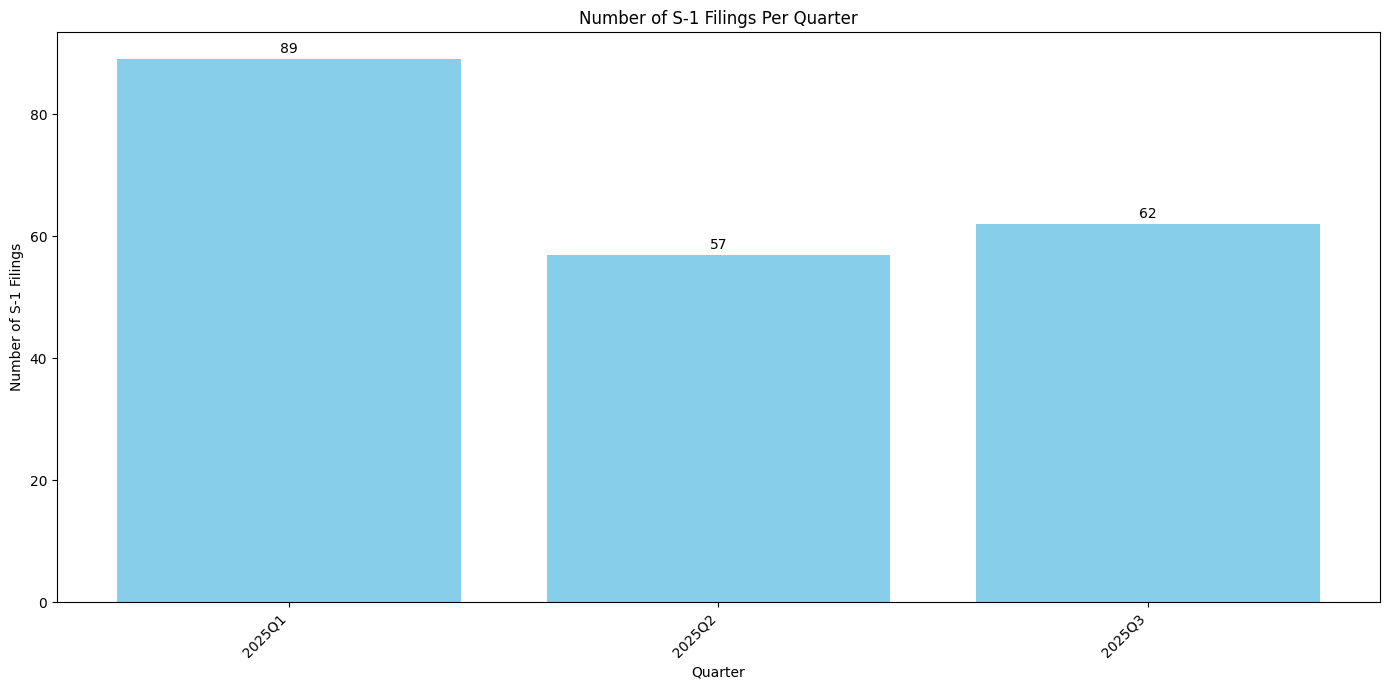

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Re-create s1_data from all_data to ensure correct state
s1_data = filtered_s1_data[(filtered_s1_data['form'] == 'S-1') | (filtered_s1_data['form'] == 'S-1/A')][['cik', 'name', 'sic', 'filed', 'form']]

# Filter for S-1 forms only
s1_filings = s1_data[s1_data['form'] == 'S-1'].copy()

# Convert 'filed' column to datetime, assuming format YYYYMMDD
s1_filings['filed'] = pd.to_datetime(s1_filings['filed'], format='%Y%m%d')

# Extract year and quarter
s1_filings['year_quarter'] = s1_filings['filed'].dt.to_period('Q')

# Count S-1 filings per quarter
quarterly_s1_counts = s1_filings.groupby('year_quarter').size().reset_index(name='count')

# Sort by year_quarter for proper plotting order
quarterly_s1_counts = quarterly_s1_counts.sort_values('year_quarter')

# Convert 'year_quarter' back to string for plotting if necessary (matplotlib handles Period objects well too)
quarterly_s1_counts['year_quarter_str'] = quarterly_s1_counts['year_quarter'].astype(str)

# Plotting the results
plt.figure(figsize=(14, 7))
bars = plt.bar(quarterly_s1_counts['year_quarter_str'], quarterly_s1_counts['count'], color='skyblue')
plt.xlabel('Quarter')
plt.ylabel('Number of S-1 Filings')
plt.title('Number of S-1 Filings Per Quarter')
plt.xticks(rotation=45, ha='right')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom') # Adjust 0.5 for label position

plt.tight_layout()
plt.show()

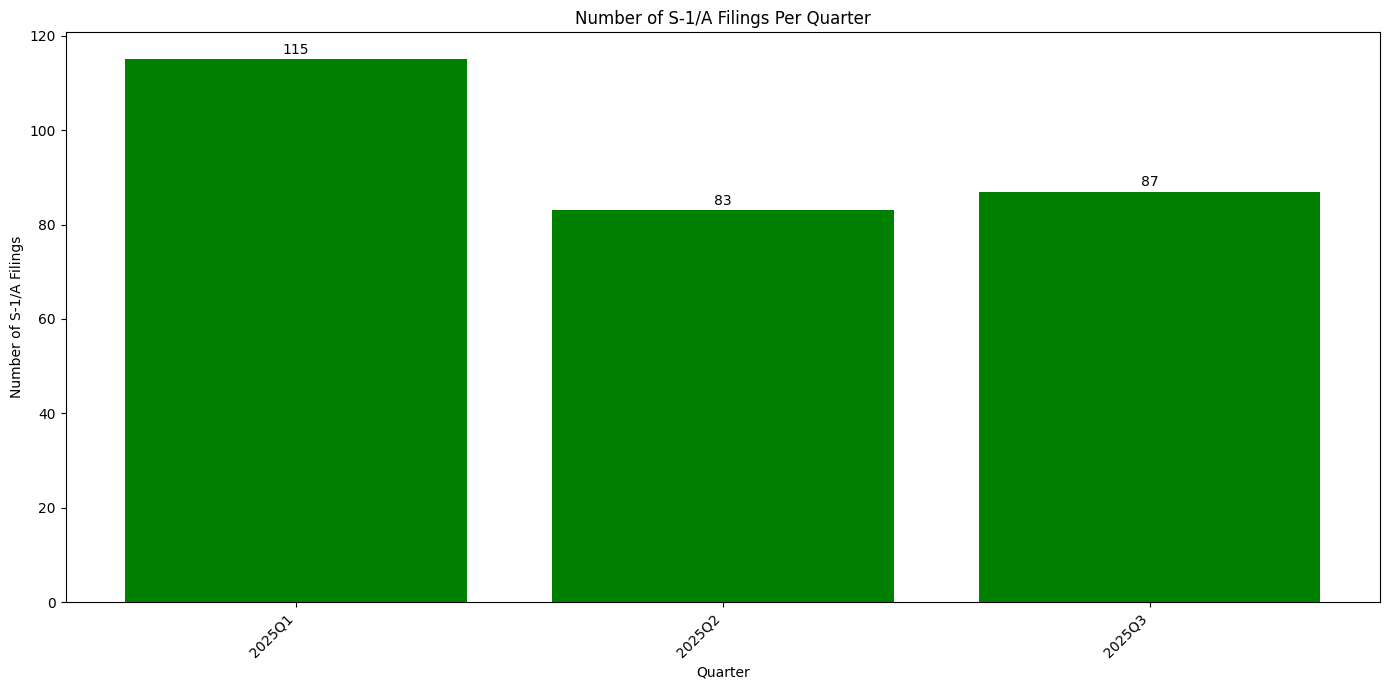

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Re-create s1_data from all_data to ensure correct state
s1_data = filtered_s1_data[(filtered_s1_data['form'] == 'S-1') | (filtered_s1_data['form'] == 'S-1/A')][['cik', 'name', 'sic', 'filed', 'form']]

# Filter for S-1A forms only
s1A_filings = s1_data[s1_data['form'] == 'S-1/A'].copy()

# Convert 'filed' column to datetime, assuming format YYYYMMDD
s1A_filings['filed'] = pd.to_datetime(s1A_filings['filed'], format='%Y%m%d')

# Extract year and quarter
s1A_filings['year_quarter'] = s1A_filings['filed'].dt.to_period('Q')

# Count S-1A filings per quarter
quarterly_s1A_counts = s1A_filings.groupby('year_quarter').size().reset_index(name='count')

# Sort by year_quarter for proper plotting order
quarterly_s1A_counts = quarterly_s1A_counts.sort_values('year_quarter')

# Convert 'year_quarter' back to string for plotting if necessary (matplotlib handles Period objects well too)
quarterly_s1A_counts['year_quarter_str'] = quarterly_s1A_counts['year_quarter'].astype(str)

# Plotting the results
plt.figure(figsize=(14, 7))
bars = plt.bar(quarterly_s1A_counts['year_quarter_str'], quarterly_s1A_counts['count'], color='green')
plt.xlabel('Quarter')
plt.ylabel('Number of S-1/A Filings')
plt.title('Number of S-1/A Filings Per Quarter')
plt.xticks(rotation=45, ha='right')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom') # Adjust 0.5 for label position

plt.tight_layout()
plt.show()

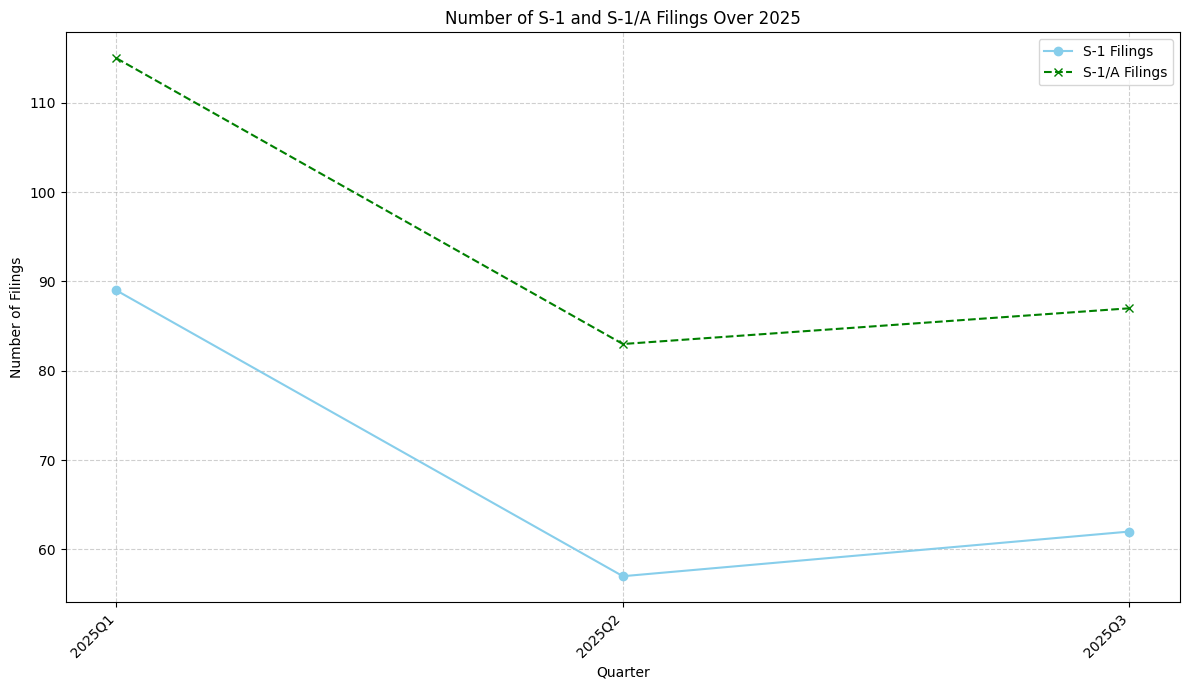

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure both dataframes have 'year_quarter_str' for consistent plotting
# (These columns should already exist from previous steps)

# Merge the two quarterly counts DataFrames
combined_quarterly_counts = pd.merge(
    quarterly_s1_counts.rename(columns={'count': 'S-1 Count'}),
    quarterly_s1A_counts.rename(columns={'count': 'S-1/A Count'}),
    on='year_quarter_str',
    how='outer'
).fillna(0)

# Sort by year_quarter_str for correct plotting order
combined_quarterly_counts = combined_quarterly_counts.sort_values('year_quarter_str')

plt.figure(figsize=(12, 7))

# Plot S-1 filings
plt.plot(combined_quarterly_counts['year_quarter_str'], combined_quarterly_counts['S-1 Count'],
         marker='o', linestyle='-', color='skyblue', label='S-1 Filings')

# Plot S-1/A filings
plt.plot(combined_quarterly_counts['year_quarter_str'], combined_quarterly_counts['S-1/A Count'],
         marker='x', linestyle='--', color='green', label='S-1/A Filings')

plt.xlabel('Quarter')
plt.ylabel('Number of Filings')
plt.title('Number of S-1 and S-1/A Filings Over 2025')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Calculate the frequency of each SIC code in s1_data
sic_code_counts = s1_data['sic'].value_counts().reset_index()
sic_code_counts.columns = ['SIC Code', 'Count']

# Display the pivot-table-like result
display(sic_code_counts)

,SIC Code,Count
0,2834.0,75
1,2836.0,36
2,6199.0,27
3,7372.0,24
4,3841.0,22
...,...,...
80,7819.0,1
81,5411.0,1
82,6221.0,1
83,3559.0,1


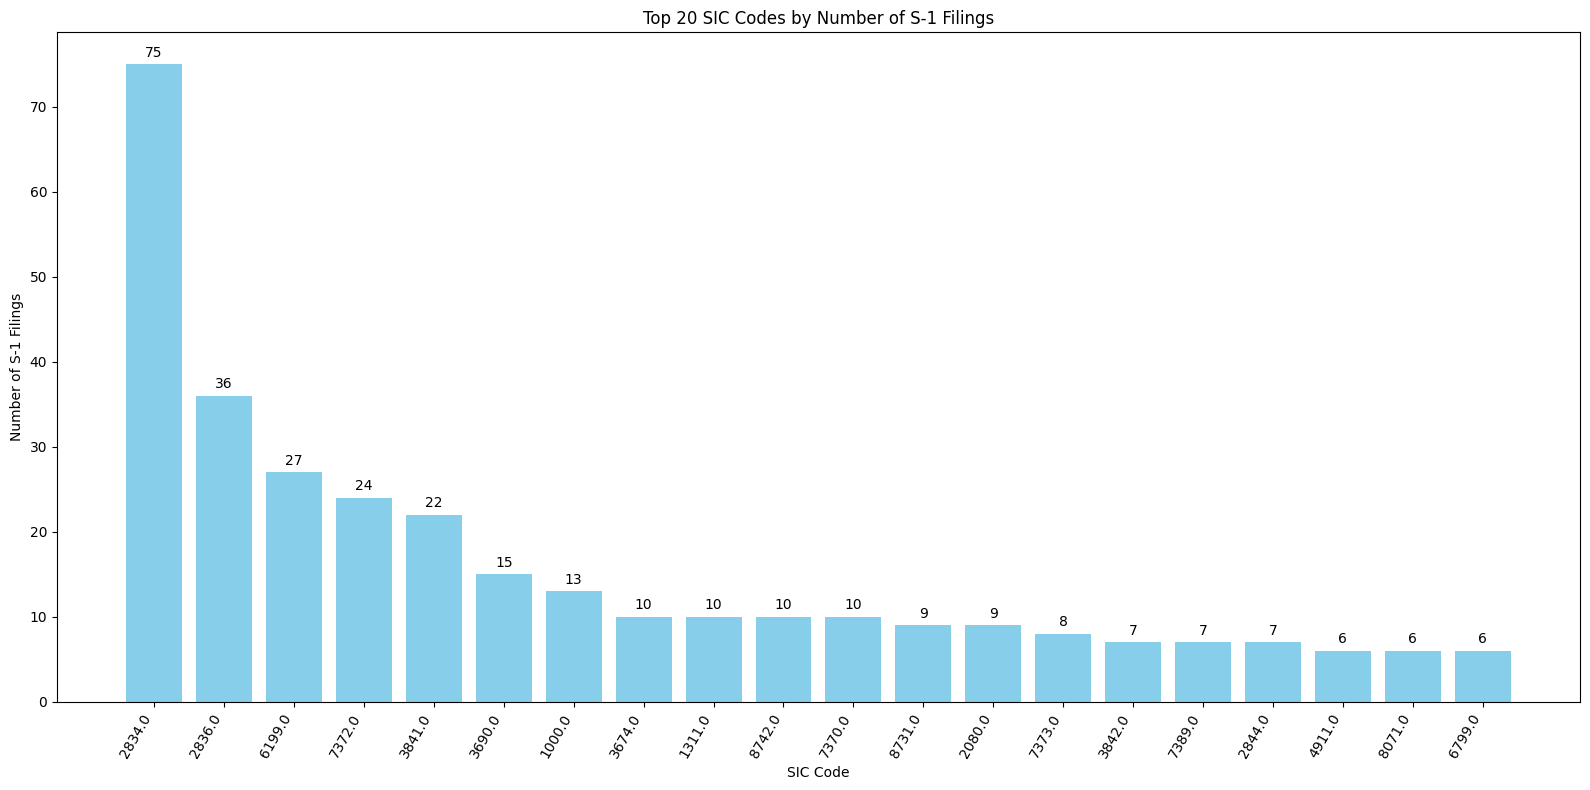

In [12]:
import matplotlib.pyplot as plt

# Ensure sic_code_counts_s1A is sorted and select top N for plotting readability
# Assuming sic_code_counts_s1A is already sorted by Count descending
N = 20 # Display top N SIC codes
plot_data = sic_code_counts.head(N)

plt.figure(figsize=(16, 8))
bars = plt.bar(plot_data['SIC Code'].astype(str), plot_data['Count'], color='skyblue')
plt.xlabel('SIC Code')
plt.ylabel('Number of S-1 Filings')
plt.title(f'Top {N} SIC Codes by Number of S-1 Filings')
plt.xticks(rotation=60, ha='right') # Rotate for better readability of SIC codes

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [13]:
# Calculate the frequency of each SIC code in s1A_filings
sic_code_counts_s1A = s1A_filings['sic'].value_counts().reset_index()
sic_code_counts_s1A.columns = ['SIC Code', 'Count']

# Display the pivot-table-like result
display(sic_code_counts_s1A)

,SIC Code,Count
0,2834.0,41
1,2836.0,19
2,6199.0,18
3,3841.0,10
4,7372.0,9
...,...,...
61,4953.0,1
62,7997.0,1
63,3825.0,1
64,7340.0,1


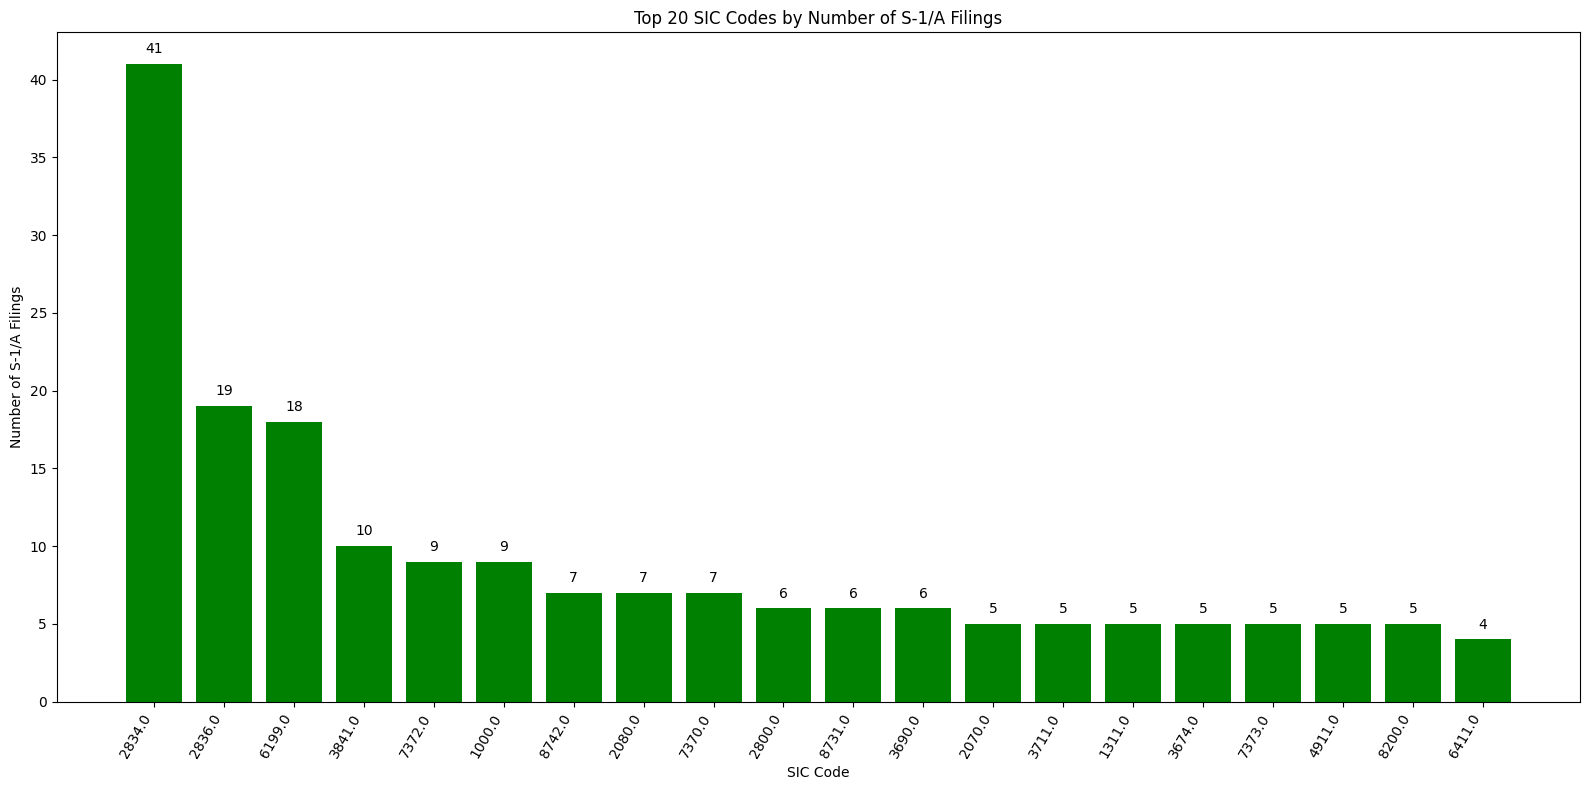

In [14]:
import matplotlib.pyplot as plt

# Ensure sic_code_counts_s1A is sorted and select top N for plotting readability
# Assuming sic_code_counts_s1A is already sorted by Count descending
N = 20 # Display top N SIC codes
plot_data = sic_code_counts_s1A.head(N)

plt.figure(figsize=(16, 8))
bars = plt.bar(plot_data['SIC Code'].astype(str), plot_data['Count'], color='green')
plt.xlabel('SIC Code')
plt.ylabel('Number of S-1/A Filings')
plt.title(f'Top {N} SIC Codes by Number of S-1/A Filings')
plt.xticks(rotation=60, ha='right') # Rotate for better readability of SIC codes

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

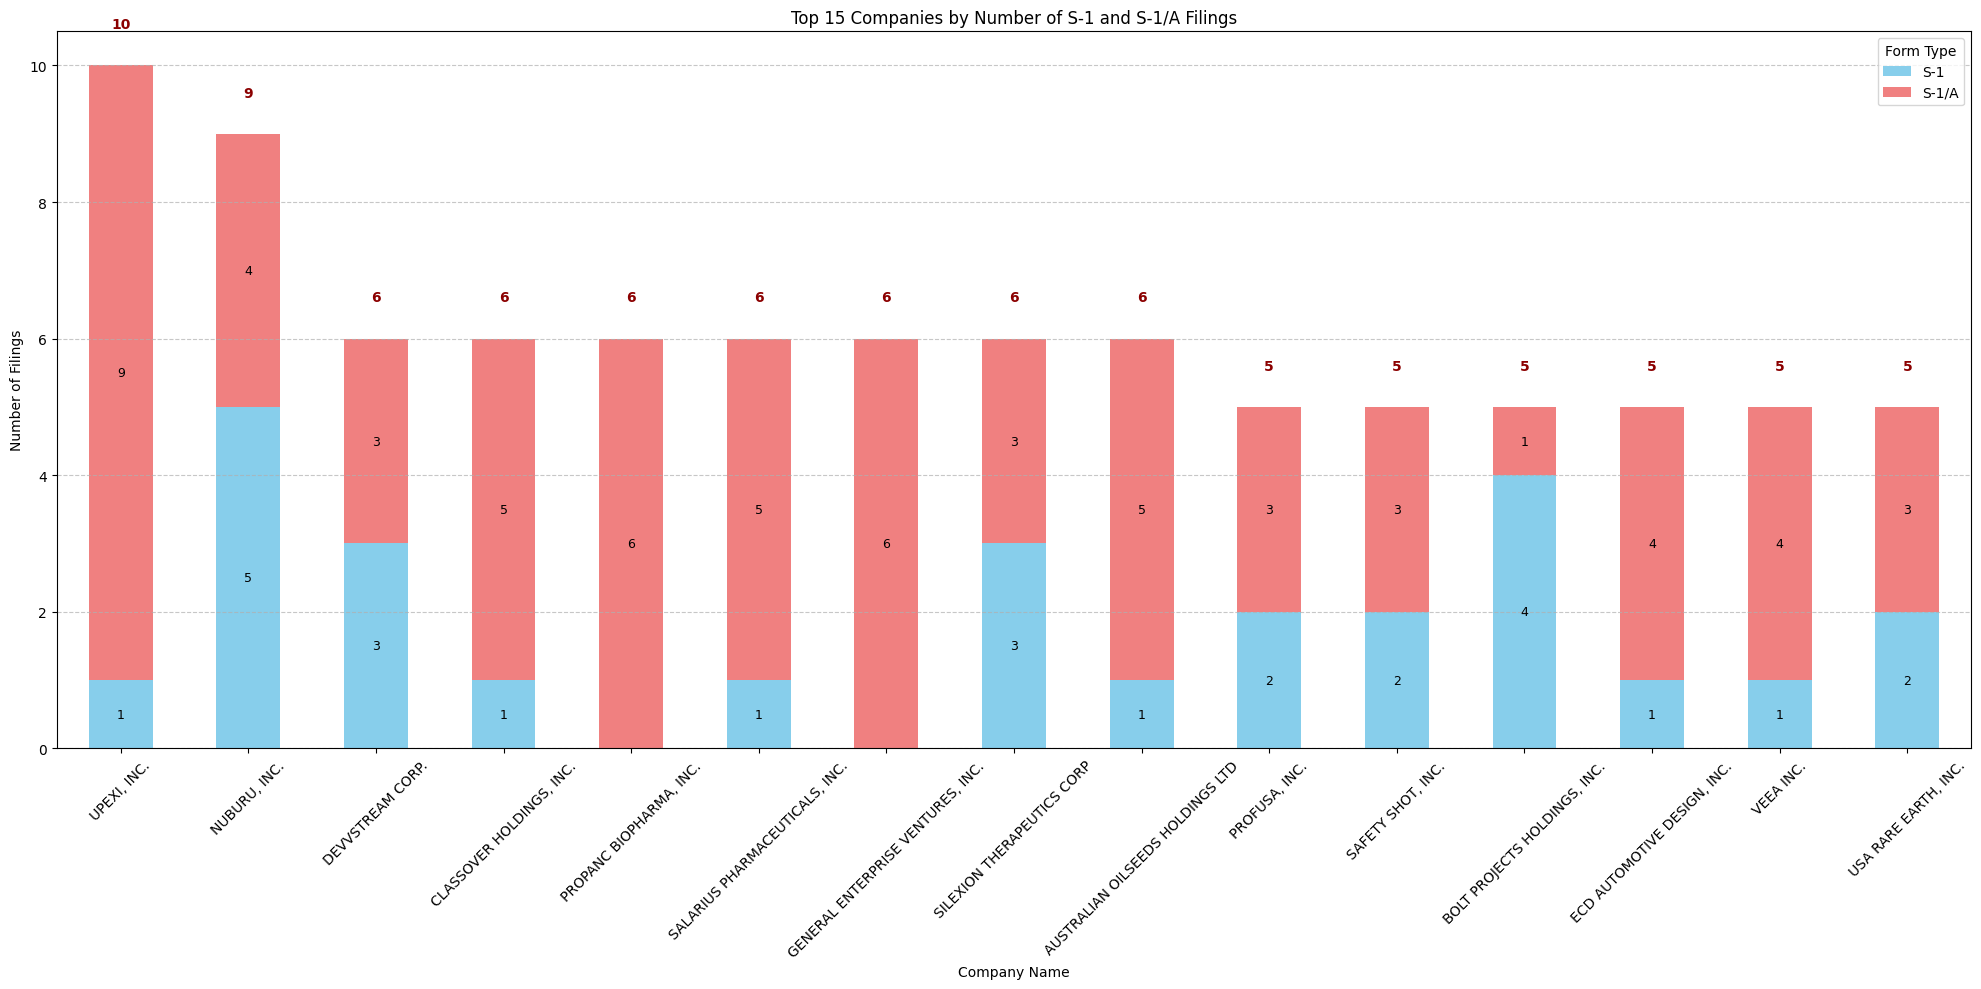

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure s1_data is up-to-date
s1_data = filtered_s1_data[(filtered_s1_data['form'] == 'S-1') | (filtered_s1_data['form'] == 'S-1/A')][['cik', 'name', 'sic', 'filed', 'form']]

# Group by company name and form type, then count filings
filings_by_company_form = s1_data.groupby(['name', 'form']).size().unstack(fill_value=0)

# Ensure both 'S-1' and 'S-1/A' columns exist, even if a company has none
if 'S-1' not in filings_by_company_form.columns:
    filings_by_company_form['S-1'] = 0
if 'S-1/A' not in filings_by_company_form.columns:
    filings_by_company_form['S-1/A'] = 0

# Sort by total filings to make the chart more readable (optional)
filings_by_company_form['total_filings'] = filings_by_company_form['S-1'] + filings_by_company_form['S-1/A']
filings_by_company_form = filings_by_company_form.sort_values('total_filings', ascending=False).drop(columns='total_filings')

# Select the top N companies for better visualization if there are many
# Adjust N as needed, e.g., to 20 or 30
N = 15
filings_to_plot = filings_by_company_form.head(N)

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(20, 10))

filings_to_plot[['S-1', 'S-1/A']].plot(kind='bar', stacked=True, ax=ax, color={'S-1': 'skyblue', 'S-1/A': 'lightcoral'})

# Add data labels for each segment (S-1 and S-1/A)
for container in ax.containers:
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in container.patches]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9, color='black')

# Add total data labels above each stacked bar
# Calculate the total height for each bar
totals = filings_to_plot['S-1'] + filings_to_plot['S-1/A']

# Get the x positions of the bars. Assuming bar width is 0.8 by default for pandas plot.
# The x-coordinates from ax.patches can be used for more robust positioning.
# Iterate over the first set of bars (e.g., S-1) to get the x-coordinates
# The x-coordinate for a group of bars is typically the center of the group.
# The bar_label function will handle the x-coordinates automatically if you pass the containers.

# For total labels, we can directly iterate over the x-ticks and apply the total.
# Since we are using pandas plot, the x-coordinates of each group of bars will be 0, 1, 2, ... for each company.
x_coords = [p.get_x() + p.get_width() / 2 for p in ax.containers[0].patches]

for i, total in enumerate(totals):
    if total > 0:
        ax.text(x_coords[i], totals.iloc[i] + 0.5, int(total), ha='center', va='bottom', fontsize=10, color='darkred', fontweight='bold')


ax.set_title(f'Top {N} Companies by Number of S-1 and S-1/A Filings')
ax.set_xlabel('Company Name')
ax.set_ylabel('Number of Filings')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Form Type')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Companies may decide to file more than one S-1 form, if they choose to give more than one major offering of their stock.

#### **Converting .txt files to .csv for Malloy**

In [16]:
# Convert 'period', 'filed', and 'accepted' columns in sub_q1 to datetime objects
# Using errors='coerce' will turn non-parseable dates into NaT (Not a Time)
sub_q1['period'] = pd.to_datetime(sub_q1['period'], format='%Y%m%d', errors='coerce')
sub_q1['filed'] = pd.to_datetime(sub_q1['filed'], format='%Y%m%d', errors='coerce')
sub_q1['accepted'] = pd.to_datetime(sub_q1['accepted'], errors='coerce')

# Display the info of sub_q1 to check the new data types
sub_q1.info()

# Display the first few rows to see the converted dates
display(sub_q1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6231 entries, 0 to 6230
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   adsh        6231 non-null   object        
 1   cik         6231 non-null   int64         
 2   name        6231 non-null   object        
 3   sic         6058 non-null   float64       
 4   countryba   6224 non-null   object        
 5   stprba      5518 non-null   object        
 6   cityba      6224 non-null   object        
 7   zipba       6219 non-null   object        
 8   bas1        6225 non-null   object        
 9   bas2        2751 non-null   object        
 10  baph        6225 non-null   object        
 11  countryma   6212 non-null   object        
 12  stprma      5524 non-null   object        
 13  cityma      6214 non-null   object        
 14  zipma       6206 non-null   object        
 15  mas1        6214 non-null   object        
 16  mas2        2754 non-nul

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
0,0000015615-25-000021,15615,MASTEC INC,1623.0,US,FL,CORAL GABLES,33134,800 S. DOUGLAS ROAD,12TH FLOOR,...,2024-12-31,2024.0,FY,2025-02-28,2025-02-28 06:07:00,0,1,mtz-20241231_htm.xml,1,NaN
1,0000016058-25-000032,16058,CACI INTERNATIONAL INC /DE/,7373.0,US,VA,RESTON,20190,TWO RESTON OVERLOOK,12021 SUNSET HILLS ROAD,...,2024-12-31,2025.0,Q2,2025-01-28,2025-01-28 13:06:00,0,1,caci-20241231_htm.xml,1,NaN
2,0000016732-25-000026,16732,CAMPBELL'S CO,2000.0,US,NJ,CAMDEN,08103,CAMPBELL PL,NaN,...,2025-01-31,2025.0,Q2,2025-03-05,2025-03-05 07:24:00,0,1,cpb-20250126_htm.xml,1,NaN
3,0000016868-25-000011,16868,CANADIAN NATIONAL RAILWAY CO,4011.0,CA,QC,CANADA,H3B 2M9,935 DE LA GAUCHETIERE ST W,MONTREAL QUEBEC,...,2024-12-31,2024.0,FY,2025-02-04,2025-02-04 16:13:00,0,1,cni-20241231_d2_htm.xml,1,NaN
4,0000016875-25-000008,16875,CANADIAN PACIFIC KANSAS CITY LTD/CN,4011.0,CA,AB,CALGARY ALBERTA,T2C 4X9,7550 OGDEN DALE ROAD S.E.,NaN,...,2024-12-31,2024.0,FY,2025-02-27,2025-02-27 11:25:00,0,1,cp-20241231_htm.xml,1,NaN


In [17]:
# Convert 'period', 'filed', and 'accepted' columns in sub_q1 to datetime objects
# Using errors='coerce' will turn non-parseable dates into NaT (Not a Time)
sub_q2['period'] = pd.to_datetime(sub_q2['period'], format='%Y%m%d', errors='coerce')
sub_q2['filed'] = pd.to_datetime(sub_q2['filed'], format='%Y%m%d', errors='coerce')
sub_q2['accepted'] = pd.to_datetime(sub_q2['accepted'], errors='coerce')

# Display the info of sub_q2 to check the new data types
sub_q2.info()

# Display the first few rows to see the converted dates
display(sub_q2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009 entries, 0 to 7008
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   adsh        7009 non-null   object        
 1   cik         7009 non-null   int64         
 2   name        7009 non-null   object        
 3   sic         6831 non-null   float64       
 4   countryba   6943 non-null   object        
 5   stprba      6001 non-null   object        
 6   cityba      6999 non-null   object        
 7   zipba       6949 non-null   object        
 8   bas1        7000 non-null   object        
 9   bas2        3262 non-null   object        
 10  baph        7001 non-null   object        
 11  countryma   6936 non-null   object        
 12  stprma      6019 non-null   object        
 13  cityma      6992 non-null   object        
 14  zipma       6942 non-null   object        
 15  mas1        6992 non-null   object        
 16  mas2        3253 non-nul

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
0,0000950170-25-071771,1965934,OVERLAND ADVANTAGE,NaN,US,NY,NEW YORK,10152,375 PARK AVENUE,11TH FLOOR,...,2025-03-31,2025.0,Q1,2025-05-15,2025-05-14 20:36:00,0,1,ck0001965934-20250331_htm.xml,1,NaN
1,0000950170-25-070633,2052153,APOLLO ORIGINATION II (UL) CAPITAL TRUST,NaN,US,NY,NEW YORK,10019,"9 WEST 57TH STREET, 42ND FLOOR",NaN,...,2025-03-31,2025.0,Q1,2025-05-14,2025-05-13 18:14:00,0,1,ck0002052153-20250331_htm.xml,1,NaN
2,0000816956-25-000011,816956,CONMED CORP,3845.0,US,FL,LARGO,33773,11311 CONCEPT BOULEVARD,NaN,...,2025-03-31,2025.0,Q1,2025-05-01,2025-05-01 11:08:00,0,1,cnmd-20250331_htm.xml,1,NaN
3,0001213900-25-037427,1997201,PS INTERNATIONAL GROUP LTD.,4731.0,CN,NaN,HONG KONG,00000,"UN. 1002, 10/F, JOIN-IN HANG SING CTR.,","#2-16 KWAI FUNG CRESCENT, KWAI CHUNG, NT",...,2024-12-31,2024.0,FY,2025-04-30,2025-04-30 14:06:00,0,1,ea0238916-20f_psinter_htm.xml,1,NaN
4,0001679273-25-000026,1679273,"LAMB WESTON HOLDINGS, INC.",2030.0,US,ID,EAGLE,83616,599 S. RIVERSHORE LANE,NaN,...,2025-02-28,2025.0,Q3,2025-04-03,2025-04-03 13:05:00,0,1,lw-20250223_htm.xml,1,NaN


In [18]:
# Convert 'period', 'filed', and 'accepted' columns in sub_q1 to datetime objects
# Using errors='coerce' will turn non-parseable dates into NaT (Not a Time)
sub_q3['period'] = pd.to_datetime(sub_q3['period'], format='%Y%m%d', errors='coerce')
sub_q3['filed'] = pd.to_datetime(sub_q3['filed'], format='%Y%m%d', errors='coerce')
sub_q3['accepted'] = pd.to_datetime(sub_q3['accepted'], errors='coerce')

# Display the info of sub_q3 to check the new data types
sub_q3.info()

# Display the first few rows to see the converted dates
display(sub_q3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6541 entries, 0 to 6540
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   adsh        6541 non-null   object        
 1   cik         6541 non-null   int64         
 2   name        6541 non-null   object        
 3   sic         6369 non-null   float64       
 4   countryba   6301 non-null   object        
 5   stprba      5685 non-null   object        
 6   cityba      6534 non-null   object        
 7   zipba       6404 non-null   object        
 8   bas1        6534 non-null   object        
 9   bas2        3004 non-null   object        
 10  baph        6538 non-null   object        
 11  countryma   6299 non-null   object        
 12  stprma      5701 non-null   object        
 13  cityma      6532 non-null   object        
 14  zipma       6401 non-null   object        
 15  mas1        6531 non-null   object        
 16  mas2        2990 non-nul

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
0,0000008947-25-000140,8947,AZZ INC,3470.0,US,TX,FORT WORTH,76107,"ONE MUSEUM PLACE, SUITE 500",3100 W 7TH STREET,...,2025-05-31,2026.0,Q1,2025-07-09,2025-07-09 16:15:00,0,1,azz-20250531_htm.xml,1,NaN
1,0000009326-25-000014,9326,BALCHEM CORP,2800.0,US,NJ,MONTVALE,07645,5 PARAGON DRIVE,NaN,...,2025-06-30,2025.0,Q2,2025-07-31,2025-07-31 16:17:00,0,1,bcpc-20250630_htm.xml,1,NaN
2,0000010048-25-000025,10048,BARNWELL INDUSTRIES INC,1311.0,US,HI,HONOLULU,96813,1100 ALAKEA ST.,SUITE 500,...,2025-06-30,2025.0,Q3,2025-08-13,2025-08-13 17:08:00,0,1,brn-20250630_htm.xml,1,NaN
3,0000010795-25-000072,10795,BECTON DICKINSON & CO,3841.0,US,NJ,FRANKLIN LAKES,07417-1880,ONE BECTON DR,NaN,...,2025-06-30,2025.0,Q3,2025-08-07,2025-08-07 16:27:00,0,1,bdx-20250630_htm.xml,1,NaN
4,0000011544-25-000024,11544,BERKLEY W R CORP,6331.0,US,CT,GREENWICH,06830,475 STEAMBOAT ROAD,.,...,2025-06-30,2025.0,Q2,2025-08-04,2025-08-04 16:13:00,0,1,wrb-20250630_htm.xml,1,NaN


In [19]:
# Save the combined DataFrame to a CSV file
sub_q1.to_csv('sub_2025Q1.csv')

print("Successfully saved 'sub_2025Q1.csv'")

Successfully saved 'sub_2025Q1.csv'


In [20]:
# Save the sub_q2 DataFrame to a CSV file
sub_q2.to_csv('sub_2025Q2.csv')

print("Successfully saved 'sub_2025Q2.csv'")

Successfully saved 'sub_2025Q2.csv'


In [21]:
# Save the sub_q3 DataFrame to a CSV file
sub_q3.to_csv('sub_2025Q3.csv')

print("Successfully saved 'sub_2025Q3.csv'")

Successfully saved 'sub_2025Q3.csv'


In [22]:
# Save the num_q1 DataFrame to a CSV file
num_q1.to_csv('num_2025Q1.csv')

print("Successfully saved 'num_2025Q1.csv'")

Successfully saved 'num_2025Q1.csv'


In [23]:
# Save the num_q2 DataFrame to a CSV file
num_q2.to_csv('num_2025Q2.csv')

print("Successfully saved 'num_2025Q2.csv'")

Successfully saved 'num_2025Q2.csv'


In [24]:
# Save the num_q3 DataFrame to a CSV file
num_q3.to_csv('num_2025Q3.csv')

print("Successfully saved 'num_2025Q3.csv'")

Successfully saved 'num_2025Q3.csv'
